In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *
from fastai.callbacks import OverSamplingCallback

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/tamil")

In [20]:
data = (
    (
        ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(max_rotate=0.0, max_warp = 0.0,do_flip=False), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

(array([1028.,  967.,  944., 1038.,  977.,  967., 1038.,  962.,  955., 1044.]),
 array([  0. ,  12.3,  24.6,  36.9,  49.2,  61.5,  73.8,  86.1,  98.4, 110.7, 123. ]),
 <a list of 10 Patch objects>)

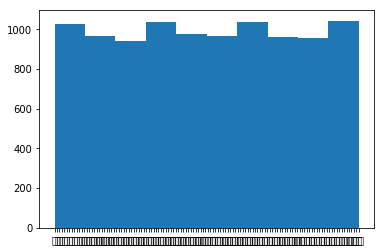

In [21]:
class_sam = [str(x) for x in data.train_ds.y]
plt.hist(class_sam)

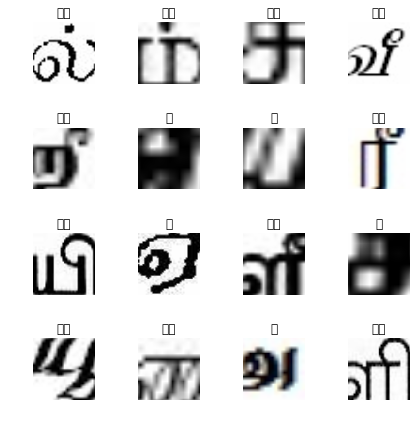

In [23]:
data.show_batch(4, figsize=(6,6))

In [24]:
data.c

124

In [17]:
learn = None
gc.collect()

31417

# resnet34 normal

In [18]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


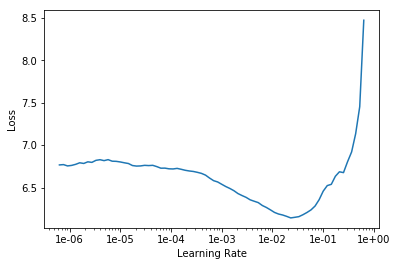

In [19]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,4.489100,2.646841,0.322581,00:13
1,2.203803,1.072251,0.651210,00:13
2,1.323327,0.706295,0.759677,00:13
3,1.166054,0.533659,0.828226,00:14
4,0.902750,0.480391,0.851613,00:13
5,0.712257,0.388856,0.881048,00:14
6,0.568745,0.417758,0.866935,00:13
7,0.480771,0.288242,0.897581,00:14
8,0.420596,0.200146,0.929032,00:14
9,0.359915,0.220920,0.916129,00:14


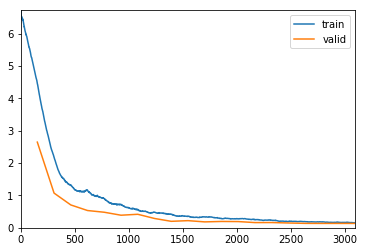

In [25]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-5, 1e-2), wd=1e-3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


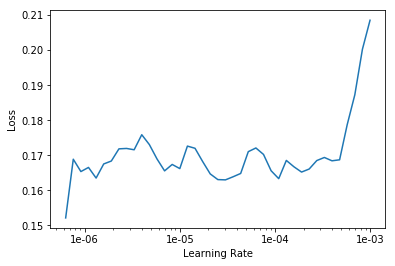

In [26]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.161316,0.139873,0.945968,00:14
1,0.166655,0.144366,0.945565,00:13
2,0.177560,0.150178,0.939919,00:14
3,0.196168,0.151854,0.941532,00:14
4,0.192032,0.185355,0.929032,00:14
5,0.197131,0.147542,0.947581,00:14
6,0.214842,0.179375,0.939113,00:14
7,0.178629,0.149327,0.943145,00:14
8,0.180298,0.152310,0.946371,00:14
9,0.182898,0.162293,0.943145,00:14


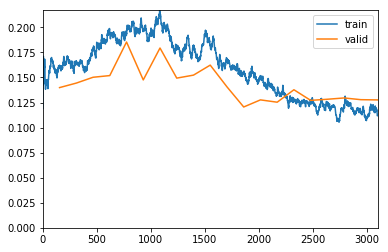

In [27]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(4e-5, 1e-4), wd=1e-2)

In [29]:
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


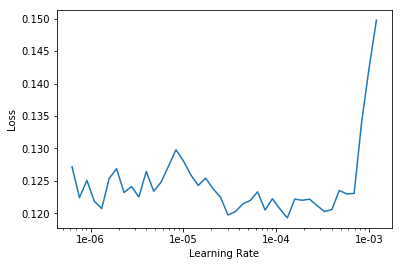

In [30]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.128232,0.138604,0.948790,00:14
1,0.153739,0.158489,0.940323,00:14
2,0.234949,0.213698,0.924597,00:14
3,0.222165,0.173689,0.936290,00:14
4,0.184629,0.163550,0.936694,00:14
5,0.170056,0.161283,0.940323,00:14
6,0.154023,0.147294,0.943952,00:13
7,0.133030,0.144613,0.947581,00:13
8,0.123640,0.147137,0.945161,00:14
9,0.111159,0.142606,0.944355,00:14


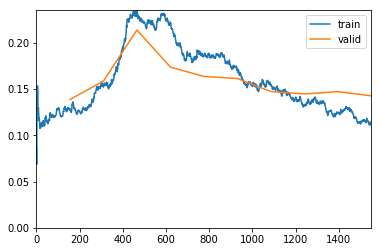

In [31]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(3e-5, 4e-4), wd=1e-2)

In [32]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

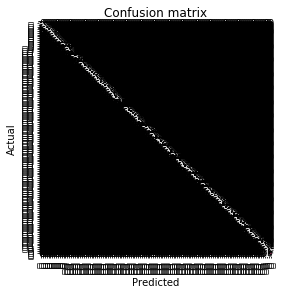

In [35]:
interp.plot_confusion_matrix(cmap = 'magma')